Univerzitet u Sarajevu
<br> Elektrotehnički fakultet
#### **Predmet: Multimedijalni Sistemi**

# Laboratorijska vježba 10: Koraci JPEG dekompresije

Za izradu laboratorijske vježbe treba koristiti odgovarajuću Jupyter Notebook datoteku. Urađenu vježbu je potrebno konvertirati u PDF format, a zatim je PDF datoteku potrebno predati do postavljenog roka koristeći platformu Zamger.

*Ime* i prezime studenta, broj indeksa:

Amar Hasečić, 2116/18673

Datum izrade izvještaja:

26.05.2024

---

## Zadatak 1.

Potrebno je implementirati funkciju <code>JPEGDekomp(QDCTKoef)</code> koja kao ulazni argument prima matricu kvantiziranih DCT koeficijenata *QDCTKoef* dimenzija 8x8, te izvodi sljedeće korake JPEG dekompresije:

1. Koristeći kvantizacijsku tabelu <code>Q</code> definiranu u kodu iznad, prvo se izvodi dekvantizacija na sljedeći način:

<code>DQDCTKoef[i][j] = round(QDCTKoef[i][j] * Q[i][j])</code>

Dakle, kao rezultat se prvo dobivaju dekvantizirani DCT koeficijenti pohranjeni u matrici *DQDCTKoef*.

2. Nad dekvantiziranim DCT koeficijentima *DQDCTKoef* se izvodi dvodimenzionalna inverzna diskretna kosinusna transformacija (IDCT), što rezultira matricom koja sadrži reducirane (-128) vrijednosti intenziteta piksela bloka *B*. Za izvođenje IDCT koristite funkciju <code>idct</code> iz modula *scipy.fftpack* (<code>from scipy.fftpack import idct</code>). Dvodimenzionalnu IDCT nad *DQDCTKoef* možete dobiti na sljedeći način: <code>idct(idct(DQDCTKoef, axis = 0, norm = 'ortho'), axis = 1, norm = 'ortho').astype(int)</code>. Primijetite da je funkcija <code>idct</code> pozvana dva puta imajući u vidu da jedan poziv ove funkcije izvodi IDCT samo u jednoj dimenziji. Isto tako, primijetite da je napravljena konverzija u cjelobrojne vrijednosti.


3. Dobivenim reduciranim vrijednostima piksela nakon izvedene IDCT dodati vrijednost 128.

Kao rezultat funkcija <code>JPEGDekomp(QDCTKoef)</code> vraća matricu u kojoj su pohranjene rekonstruirane vrijednosti intenziteta piksela originalnog bloka *B*.

Detaljan opis koraka JPEG dekompresije možete naći u PDFmaterijalima na platformi C2 (poglavlje 6, str. 145-166).

In [1]:
Q = [
    [16, 11, 10, 16, 24, 40, 51, 61],
    [12, 12, 14, 19, 26, 58, 60, 55],
    [14, 13, 16, 24, 40, 57, 69, 56],
    [14, 17, 22, 29, 51, 87, 80, 62],
    [18, 22, 37, 56, 68, 109, 103, 77],
    [24, 35, 55, 64, 81, 104, 113, 92],
    [49, 64, 78, 87, 103, 121, 120, 101],
    [72, 92, 95, 98, 112, 100, 103, 99]
]

**Rješenje:**

In [19]:
from scipy.fftpack import dct
import numpy as np
def JPEGKomp(B):

    B = np.array(B)
    B = B - 128

    DCTKoef = dct(dct(B,  axis = 0, norm = 'ortho'), axis = 1, norm = 'ortho').astype(int)
    QDCTKoef = np.zeros((len(Q), len(Q)))

    for i in range(0, len(Q)):
        for j in range(0, len(Q)):
            QDCTKoef[i][j] = round(DCTKoef[i][j] / Q[i][j])

    return DCTKoef, QDCTKoef


In [20]:
import numpy as np
from scipy.fftpack import idct

def JPEGDekomp(QDCTKoef):

    DQDCTKoef = np.zeros((len(Q), len(Q)))

    for i in range(0, len(Q)):
        for j in range(0, len(Q)):
            DQDCTKoef[i][j] = round(QDCTKoef[i][j] * Q[i][j])

    IDCT = idct(idct(DQDCTKoef, axis = 0, norm = 'ortho'), axis = 1, norm = 'ortho').astype(int)

    for i in range(0, len(IDCT)):
         for j in range(0, len(IDCT)):
             IDCT[i][j] += 128

    return IDCT


Testna slika - Crvenom bojom  označen blok B1. Zelenom bojom označen blok B2.


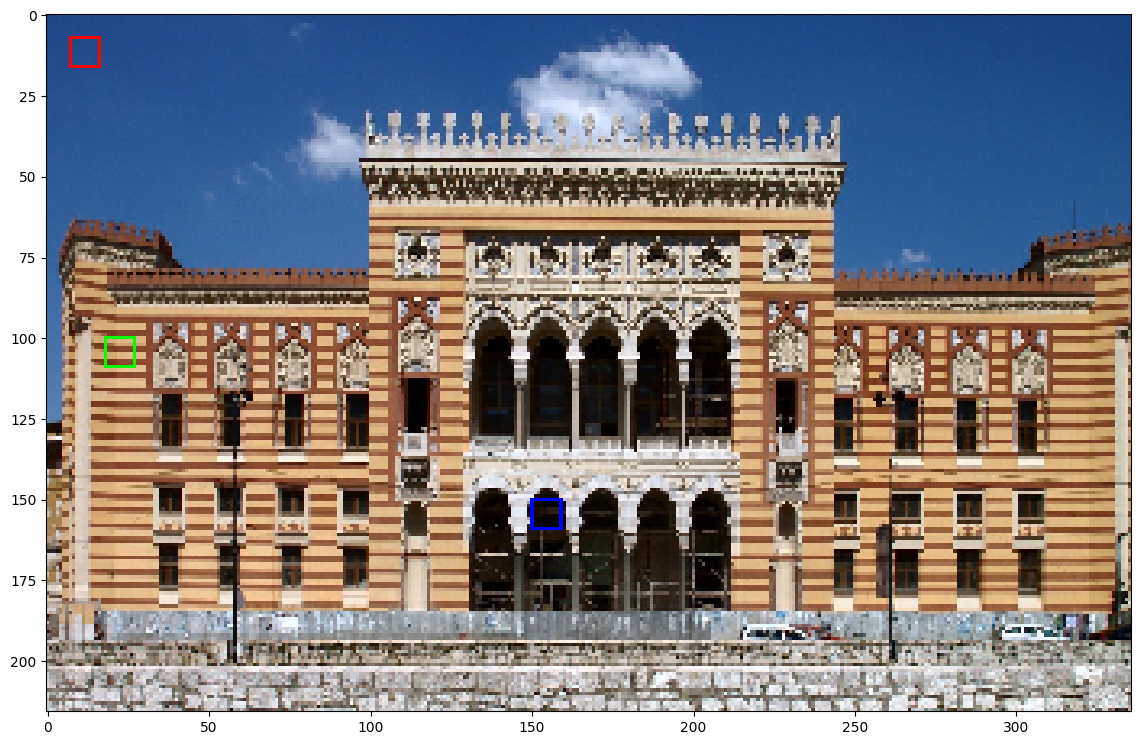


Grafički prikaz bloka B1:



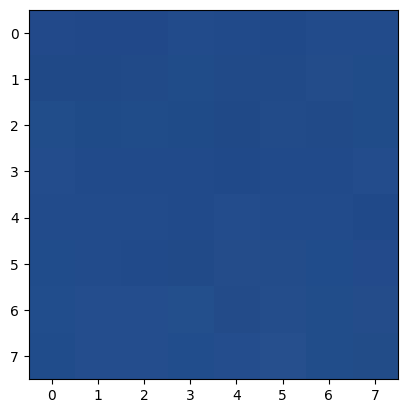

Vrijednosti intenziteta piksela luminantne komponente Y za blok B1:

[[68 67 67 70 69 68 70 70]
 [67 67 68 69 68 68 70 69]
 [70 68 69 68 67 69 68 69]
 [71 69 69 69 68 69 69 71]
 [70 70 70 69 71 70 70 68]
 [70 70 69 68 71 70 70 69]
 [71 72 72 72 70 71 70 71]
 [70 72 72 71 72 73 70 70]]

Grafički prikaz luminantne komponente Y za blok B1:



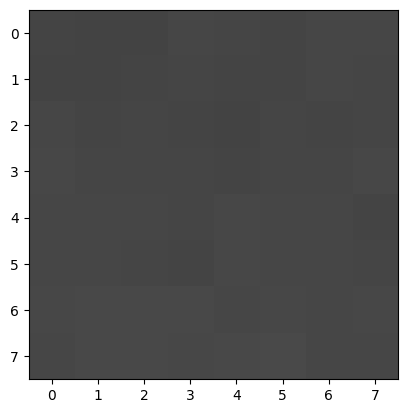


DCT koeficijenti Y komponente za blok B1:

[[-467    0    0    0    0    0    0    0]
 [  -8   -2    1    0    1    2    0    0]
 [   1   -1   -1   -1    0    0    0    0]
 [   0    0    0    0    0    0   -2    1]
 [   1    0    0    0    0    0    0    0]
 [   1    0    2   -1    1    0    0   -1]
 [  -1    0    0    1    0    0    0    0]
 [   0    1    0    0    0    0    0    0]]

Kvantizirani DCT koeficijenti Y komponente za blok B1:

[[-29.   0.   0.   0.   0.   0.   0.   0.]
 [ -1.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]]


In [21]:
from matplotlib import image
from matplotlib import pyplot
import cv2
import copy

image = image.imread('Vijecnica.bmp')

#Označavanje bloka B1 crvenom bojom
height, width, channels = image.shape
pocetak1 = (7,7)
kraj1 = (16,16)
boja1 = (255,0,0)
debljina = 1
image = cv2.rectangle(image, pocetak1, kraj1, boja1, debljina)

#Označavanje bloka B2 zelenom bojom
pocetak2 = (18,100)
kraj2 = (27,109)
boja2 = (0,255,0)
image = cv2.rectangle(image, pocetak2, kraj2, boja2, debljina)

#Označavanje bloka B3 plavom bojom
pocetak3 = (150, 150)
kraj3 = (159, 159)
boja3 = (0, 0, 255)
image = cv2.rectangle(image, pocetak3, kraj3, boja3, debljina)

print("Testna slika - Crvenom bojom  označen blok B1. Zelenom bojom označen blok B2.")

pyplot.figure(figsize = (14,10))
pyplot.imshow(image)
pyplot.show()

# Blok B je definiran elementima slike pohranjene u matrici image sadržanim u rasponu:
# image[pocetak[1]+1:kraj[1],pocetak[0]+1:kraj[0]]
# Napomena: pocetak[1] uvećevamo za 1 jer pravokutnik koji označava blok nije sastavni dio bloka
B1=copy.deepcopy(image[pocetak1[1]+1:kraj1[1],pocetak1[0]+1:kraj1[0]])
print("\nGrafički prikaz bloka B1:\n")
pyplot.imshow(B1)
pyplot.show()

# Izračunavanje Y komponente bloka B1
R, G, B = B1[:,:,0], B1[:,:,1], B1[:,:,2]
B1Y = (0.2989 * R + 0.5870 * G + 0.1140 * B).astype(int)

print("Vrijednosti intenziteta piksela luminantne komponente Y za blok B1:\n")
print(B1Y)
print("\nGrafički prikaz luminantne komponente Y za blok B1:\n")
pyplot.imshow(B1Y,cmap='gray',vmin=0,vmax=255)
pyplot.show()

DCTKoef1,QDCTKoef1 = JPEGKomp(B1Y)
print("\nDCT koeficijenti Y komponente za blok B1:\n")
print(DCTKoef1)
print("\nKvantizirani DCT koeficijenti Y komponente za blok B1:\n")
print(QDCTKoef1)

Nakon implementacije funkcije, potrebno je izvesti programski kod ispod koji se odnosi na blok B1, tako da se dobiju prikazani rezultati.


Grafički prikaz originalnih vrijednosti piksela za blok B1:



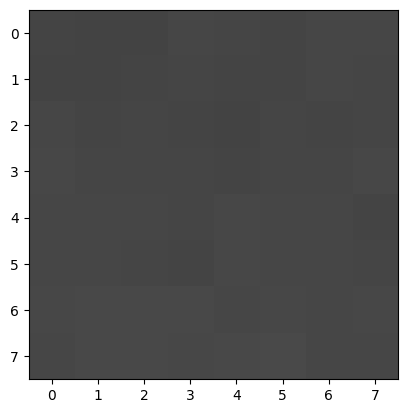


Grafički prikaz rekonstruiranih vrijednosti piksela za blok B1:



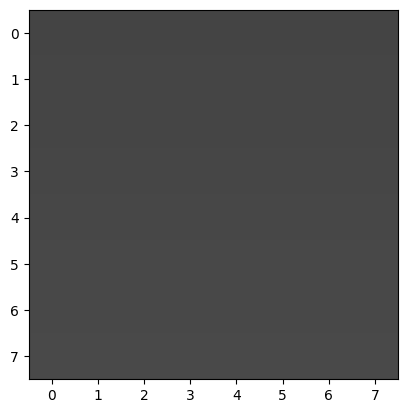


Vrijednosti intenziteta piksela za originalni blok B1:

[[68 67 67 70 69 68 70 70]
 [67 67 68 69 68 68 70 69]
 [70 68 69 68 67 69 68 69]
 [71 69 69 69 68 69 69 71]
 [70 70 70 69 71 70 70 68]
 [70 70 69 68 71 70 70 69]
 [71 72 72 72 70 71 70 71]
 [70 72 72 71 72 73 70 70]]

Rekonstruirane vrijednosti intenziteta piksela za blok B1:

[[68 68 68 68 68 68 68 68]
 [69 69 69 69 69 69 69 69]
 [69 69 69 69 69 69 69 69]
 [70 70 70 70 70 70 70 70]
 [71 71 71 71 71 71 71 71]
 [72 72 72 72 72 72 72 72]
 [72 72 72 72 72 72 72 72]
 [73 73 73 73 73 73 73 73]]

Greške rekonstrukcije vrijednosti piksela bloka B1

[[ 0 -1 -1  2  1  0  2  2]
 [-2 -2 -1  0 -1 -1  1  0]
 [ 1 -1  0 -1 -2  0 -1  0]
 [ 1 -1 -1 -1 -2 -1 -1  1]
 [-1 -1 -1 -2  0 -1 -1 -3]
 [-2 -2 -3 -4 -1 -2 -2 -3]
 [-1  0  0  0 -2 -1 -2 -1]
 [-3 -1 -1 -2 -1  0 -3 -3]]


In [22]:
RB1Y = JPEGDekomp(QDCTKoef1)

print("\nGrafički prikaz originalnih vrijednosti piksela za blok B1:\n")

pyplot.imshow(B1Y,cmap='gray',vmin=0,vmax=255)
pyplot.show()

print("\nGrafički prikaz rekonstruiranih vrijednosti piksela za blok B1:\n")

pyplot.imshow(RB1Y,cmap='gray',vmin=0,vmax=255)
pyplot.show()

print("\nVrijednosti intenziteta piksela za originalni blok B1:\n")
print(B1Y)

print("\nRekonstruirane vrijednosti intenziteta piksela za blok B1:\n")
print(RB1Y)

E1=B1Y-RB1Y
print("\nGreške rekonstrukcije vrijednosti piksela bloka B1\n")
print(E1)

Nadalje, potrebno je izvesti i programski kod ispod koji se odnosi na blok B2, tako da se dobiju prikazani rezultati. **Osim toga, potrebno je dodati i primjer rezultata dekompresije za proizvoljno odabrani blok B3 u prvom zadatku na isti način kako je to urađeno za blokove B1 i B2.**


Grafički prikaz bloka B2:



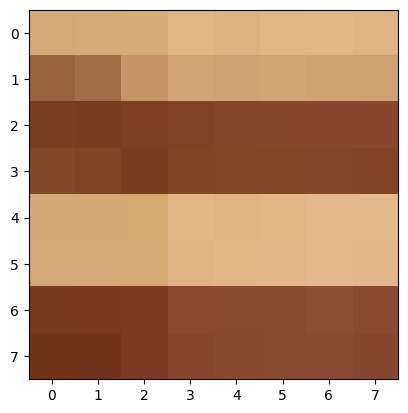

Vrijednosti intenziteta piksela luminantne komponente Y za blok B2:

[[177 178 179 188 185 188 190 187]
 [111 121 157 173 171 172 169 168]
 [ 76  75  77  81  85  86  87  87]
 [ 86  82  74  83  84  84  84  83]
 [175 174 175 190 186 189 192 193]
 [176 177 176 186 188 189 191 189]
 [ 72  72  74  90  89  89  93  89]
 [ 67  67  74  86  89  90  89  86]]

Grafički prikaz luminentne komponente Y za blok B2:



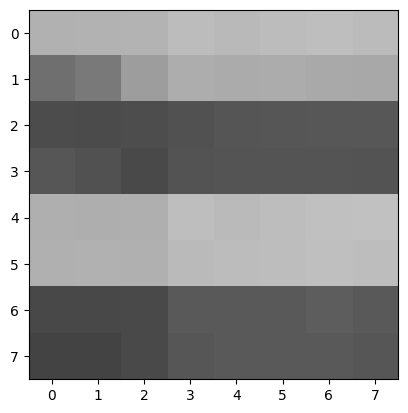


DCT koeficijenti Y komponente za blok B2:

[[  12  -56  -23    1    7    8   -3   -5]
 [ 118   -4   -7   -6   -2    0    4    1]
 [ -16  -14  -14   -4   -2    2    2    1]
 [ 323    1    3   -1    0    1   -2   -2]
 [  27   15   12    5    1    0   -2   -2]
 [-166   25   19    9    0   -2   -5   -1]
 [  34   17   15    6   -2   -4   -1    0]
 [  -7    2    6    0    0    0   -1    0]]

Kvantizirani DCT koeficijenti Y komponente za blok B2:

[[ 1. -5. -2.  0.  0.  0.  0.  0.]
 [10.  0.  0.  0.  0.  0.  0.  0.]
 [-1. -1. -1.  0.  0.  0.  0.  0.]
 [23.  0.  0.  0.  0.  0.  0.  0.]
 [ 2.  1.  0.  0.  0.  0.  0.  0.]
 [-7.  1.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]]


In [23]:
B2=copy.deepcopy(image[pocetak2[1]+1:kraj2[1],pocetak2[0]+1:kraj2[0]])

print("\nGrafički prikaz bloka B2:\n")
pyplot.imshow(B2)
pyplot.show()

# Izračunavanje Y komponente bloka B2
R, G, B = B2[:,:,0], B2[:,:,1], B2[:,:,2]
B2Y = (0.2989 * R + 0.5870 * G + 0.1140 * B).astype(int)

print("Vrijednosti intenziteta piksela luminantne komponente Y za blok B2:\n")
print(B2Y)
print("\nGrafički prikaz luminentne komponente Y za blok B2:\n")
pyplot.imshow(B2Y,cmap='gray',vmin=0,vmax=255)
pyplot.show()

DCTKoef2,QDCTKoef2 = JPEGKomp(B2Y)
print("\nDCT koeficijenti Y komponente za blok B2:\n")
print(DCTKoef2)
print("\nKvantizirani DCT koeficijenti Y komponente za blok B2:\n")
print(QDCTKoef2)


Grafički prikaz originalnih vrijednosti piksela za blok B2:



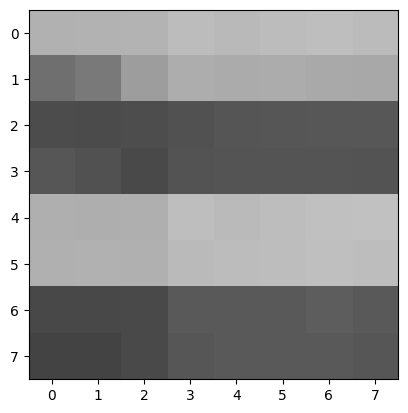


Grafički prikaz rekonstruiranih vrijednosti piksela za blok B2:



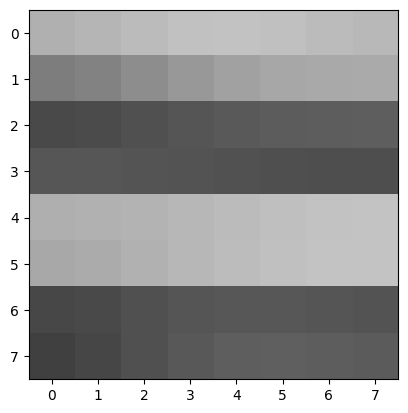


Vrijednosti intenziteta piksela za originalni blok B2:

[[177 178 179 188 185 188 190 187]
 [111 121 157 173 171 172 169 168]
 [ 76  75  77  81  85  86  87  87]
 [ 86  82  74  83  84  84  84  83]
 [175 174 175 190 186 189 192 193]
 [176 177 176 186 188 189 191 189]
 [ 72  72  74  90  89  89  93  89]
 [ 67  67  74  86  89  90  89  86]]

Rekonstruirane vrijednosti intenziteta piksela za blok B2:

[[176 181 187 193 194 192 187 184]
 [125 130 141 152 161 167 169 170]
 [ 73  75  80  85  89  92  93  94]
 [ 86  86  84  83  81  79  78  78]
 [175 177 179 183 187 191 194 195]
 [168 171 177 183 188 192 195 196]
 [ 71  74  80  85  87  87  85  83]
 [ 64  70  80  88  94  95  93  91]]

Greške rekonstrukcije vrijednosti piksela bloka B2

[[  1  -3  -8  -5  -9  -4   3   3]
 [-14  -9  16  21  10   5   0  -2]
 [  3   0  -3  -4  -4  -6  -6  -7]
 [  0  -4 -10   0   3   5   6   5]
 [  0  -3  -4   7  -1  -2  -2  -2]
 [  8   6  -1   3   0  -3  -4  -7]
 [  1  -2  -6   5   2   2   8   6]
 [  3  -3  -6  -2  -5 

In [24]:
RB2Y = JPEGDekomp(QDCTKoef2)

print("\nGrafički prikaz originalnih vrijednosti piksela za blok B2:\n")

pyplot.imshow(B2Y,cmap='gray',vmin=0,vmax=255)
pyplot.show()
print("\nGrafički prikaz rekonstruiranih vrijednosti piksela za blok B2:\n")

pyplot.imshow(RB2Y,cmap='gray',vmin=0,vmax=255)
pyplot.show()

print("\nVrijednosti intenziteta piksela za originalni blok B2:\n")
print(B2Y)

print("\nRekonstruirane vrijednosti intenziteta piksela za blok B2:\n")
print(RB2Y)


E2=B2Y-RB2Y
print("\nGreške rekonstrukcije vrijednosti piksela bloka B2\n")
print(E2)




Grafički prikaz bloka B2:



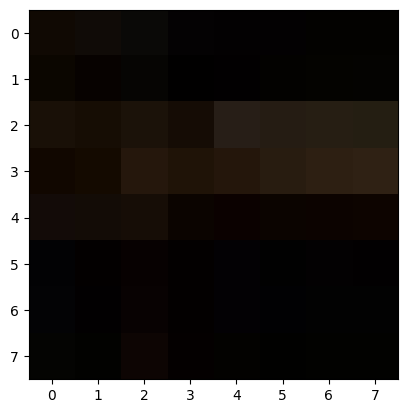

Vrijednosti intenziteta piksela luminantne komponente Y za blok B3:

[[177 178 179 188 185 188 190 187]
 [111 121 157 173 171 172 169 168]
 [ 76  75  77  81  85  86  87  87]
 [ 86  82  74  83  84  84  84  83]
 [175 174 175 190 186 189 192 193]
 [176 177 176 186 188 189 191 189]
 [ 72  72  74  90  89  89  93  89]
 [ 67  67  74  86  89  90  89  86]]

Grafički prikaz luminentne komponente Y za blok B3:



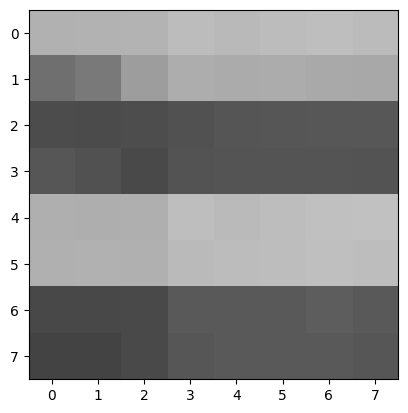


DCT koeficijenti Y komponente za blok B3:

[[  12  -56  -23    1    7    8   -3   -5]
 [ 118   -4   -7   -6   -2    0    4    1]
 [ -16  -14  -14   -4   -2    2    2    1]
 [ 323    1    3   -1    0    1   -2   -2]
 [  27   15   12    5    1    0   -2   -2]
 [-166   25   19    9    0   -2   -5   -1]
 [  34   17   15    6   -2   -4   -1    0]
 [  -7    2    6    0    0    0   -1    0]]

Kvantizirani DCT koeficijenti Y komponente za blok B3:

[[ 1. -5. -2.  0.  0.  0.  0.  0.]
 [10.  0.  0.  0.  0.  0.  0.  0.]
 [-1. -1. -1.  0.  0.  0.  0.  0.]
 [23.  0.  0.  0.  0.  0.  0.  0.]
 [ 2.  1.  0.  0.  0.  0.  0.  0.]
 [-7.  1.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]]


In [25]:
#BLOK 3 - kompresija

B3=copy.deepcopy(image[pocetak3[1]+1:kraj3[1],pocetak3[0]+1:kraj3[0]])

print("\nGrafički prikaz bloka B2:\n")
pyplot.imshow(B3)
pyplot.show()

# Izračunavanje Y komponente bloka B3
R, G, B = B2[:,:,0], B2[:,:,1], B2[:,:,2]
B3Y = (0.2989 * R + 0.5870 * G + 0.1140 * B).astype(int)

print("Vrijednosti intenziteta piksela luminantne komponente Y za blok B3:\n")
print(B3Y)
print("\nGrafički prikaz luminentne komponente Y za blok B3:\n")
pyplot.imshow(B3Y,cmap='gray',vmin=0,vmax=255)
pyplot.show()

DCTKoef3,QDCTKoef3 = JPEGKomp(B3Y)
print("\nDCT koeficijenti Y komponente za blok B3:\n")
print(DCTKoef3)
print("\nKvantizirani DCT koeficijenti Y komponente za blok B3:\n")
print(QDCTKoef3)


Grafički prikaz originalnih vrijednosti piksela za blok B3:



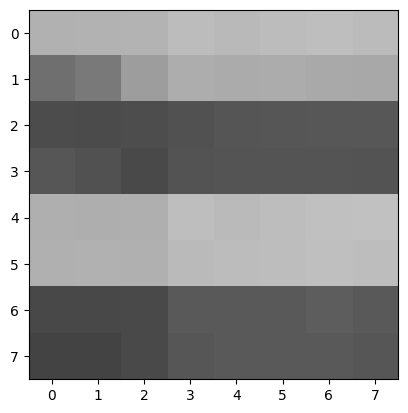


Grafički prikaz rekonstruiranih vrijednosti piksela za blok B3:



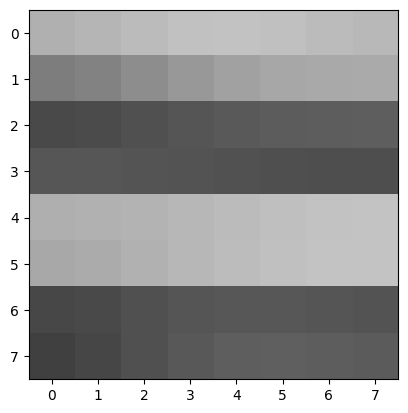


Vrijednosti intenziteta piksela za originalni blok B3:

[[177 178 179 188 185 188 190 187]
 [111 121 157 173 171 172 169 168]
 [ 76  75  77  81  85  86  87  87]
 [ 86  82  74  83  84  84  84  83]
 [175 174 175 190 186 189 192 193]
 [176 177 176 186 188 189 191 189]
 [ 72  72  74  90  89  89  93  89]
 [ 67  67  74  86  89  90  89  86]]

Rekonstruirane vrijednosti intenziteta piksela za blok B3:

[[176 181 187 193 194 192 187 184]
 [125 130 141 152 161 167 169 170]
 [ 73  75  80  85  89  92  93  94]
 [ 86  86  84  83  81  79  78  78]
 [175 177 179 183 187 191 194 195]
 [168 171 177 183 188 192 195 196]
 [ 71  74  80  85  87  87  85  83]
 [ 64  70  80  88  94  95  93  91]]

Greške rekonstrukcije vrijednosti piksela bloka B3

[[  1  -3  -8  -5  -9  -4   3   3]
 [-14  -9  16  21  10   5   0  -2]
 [  3   0  -3  -4  -4  -6  -6  -7]
 [  0  -4 -10   0   3   5   6   5]
 [  0  -3  -4   7  -1  -2  -2  -2]
 [  8   6  -1   3   0  -3  -4  -7]
 [  1  -2  -6   5   2   2   8   6]
 [  3  -3  -6  -2  -5 

In [26]:
#BLOK 3 - dekompresija

RB3Y = JPEGDekomp(QDCTKoef3)

print("\nGrafički prikaz originalnih vrijednosti piksela za blok B3:\n")

pyplot.imshow(B3Y,cmap='gray',vmin=0,vmax=255)
pyplot.show()
print("\nGrafički prikaz rekonstruiranih vrijednosti piksela za blok B3:\n")

pyplot.imshow(RB3Y,cmap='gray',vmin=0,vmax=255)
pyplot.show()

print("\nVrijednosti intenziteta piksela za originalni blok B3:\n")
print(B3Y)

print("\nRekonstruirane vrijednosti intenziteta piksela za blok B3:\n")
print(RB3Y)


E3=B3Y-RB3Y
print("\nGreške rekonstrukcije vrijednosti piksela bloka B3\n")
print(E3)